## Data Gathering

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv',sep=";")

In [14]:
data.head()

,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,pv_86,pv_87,pv_88,pv_89,pv_90,pv_91,pv_92,pv_93,pv_94,pv_95
0,2014-07-19T18:45:00+00:00,1,0,51.625703,22.712489,52.816828,53.501688,54.079161,52.683472,52.590445,...,81.286349,77.580181,58.433449,55.572970,53.792765,51.999028,43.290921,34.161343,28.349901,24.636241
1,2014-07-19T19:30:00+00:00,1,0,52.281257,6.618605,51.452796,51.676287,51.329882,51.690879,51.538671,...,55.571058,53.791009,51.997415,43.289440,34.159983,28.348652,24.635094,19.147728,12.982840,7.928666
2,2014-07-19T20:00:00+00:00,1,0,50.719565,1.452209,51.313898,52.199835,52.340547,51.844138,52.661063,...,51.996045,43.288181,34.158827,28.347590,24.634119,19.146832,12.982018,7.927911,5.622566,3.299011
3,2014-07-19T20:15:00+00:00,1,0,51.901162,0.580877,51.950475,51.624345,50.867434,51.538997,51.331161,...,43.288060,34.158716,28.347489,24.634026,19.146747,12.981939,7.927839,5.622499,3.298950,2.130662
4,2014-07-19T21:00:00+00:00,1,0,51.250007,0.000000,52.218820,52.176852,51.745211,51.809854,51.835710,...,24.633942,19.146670,12.981869,7.927774,5.622440,3.298896,2.130612,1.352937,1.246175,1.246205


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46966 entries, 0 to 46965
Columns: 197 entries, timestamp to pv_95
dtypes: float64(194), int64(2), object(1)
memory usage: 70.6+ MB


In [82]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
X=data.iloc[:,0]
y=data.loc[:,'load_00']

In [51]:
print(X.head())
print(y.head())

0   2014-07-19 18:45:00+00:00
1   2014-07-19 19:30:00+00:00
2   2014-07-19 20:00:00+00:00
3   2014-07-19 20:15:00+00:00
4   2014-07-19 21:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]
0    52.816828
1    51.452796
2    51.313898
3    51.950475
4    52.218820
Name: load_00, dtype: float64


<Axes: >

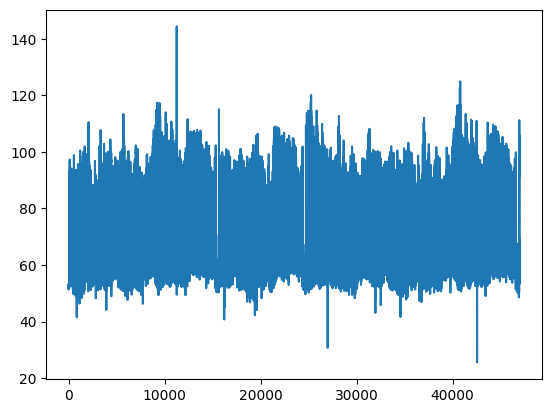

In [53]:
y.plot()

## Data Prep

In [83]:
data = data[['timestamp', 'load_00']].dropna() 
data[ 'timestamp']=data[ 'timestamp'].dt.tz_localize(None)
data.rename(columns={"timestamp":"ds","load_00":"y"}, inplace=True)
train_size = int(len(data) * 0.8)  # 80% for training
train, test = data[:train_size], data[train_size:]


In [102]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)


## Train

In [84]:

from prophet import Prophet
model = Prophet()
model.fit(train)


16:12:56 - cmdstanpy - INFO - Chain [1] start processing
16:13:07 - cmdstanpy - INFO - Chain [1] done processing


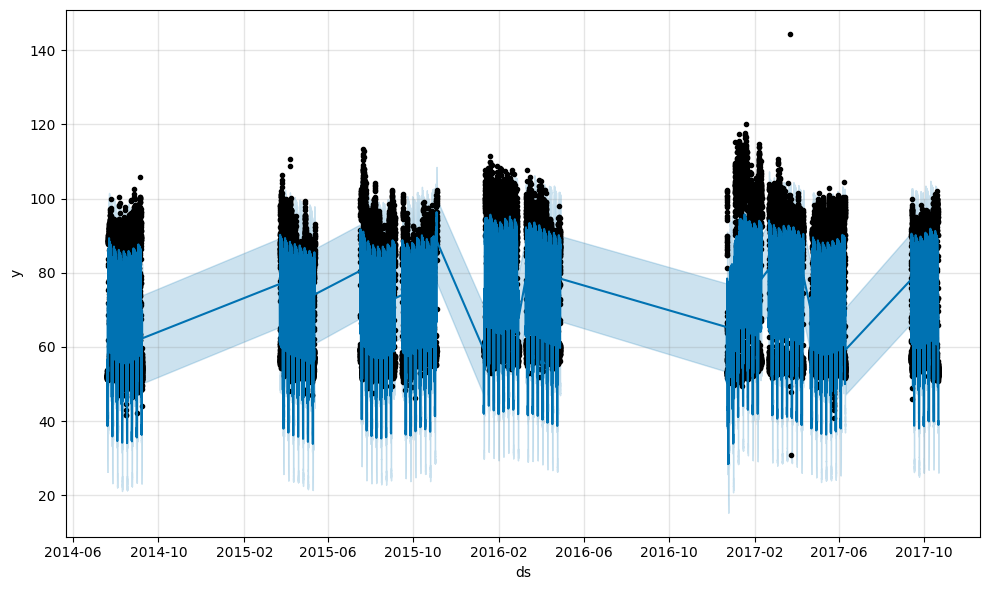

In [87]:
forecast = model.predict(train)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot(forecast)


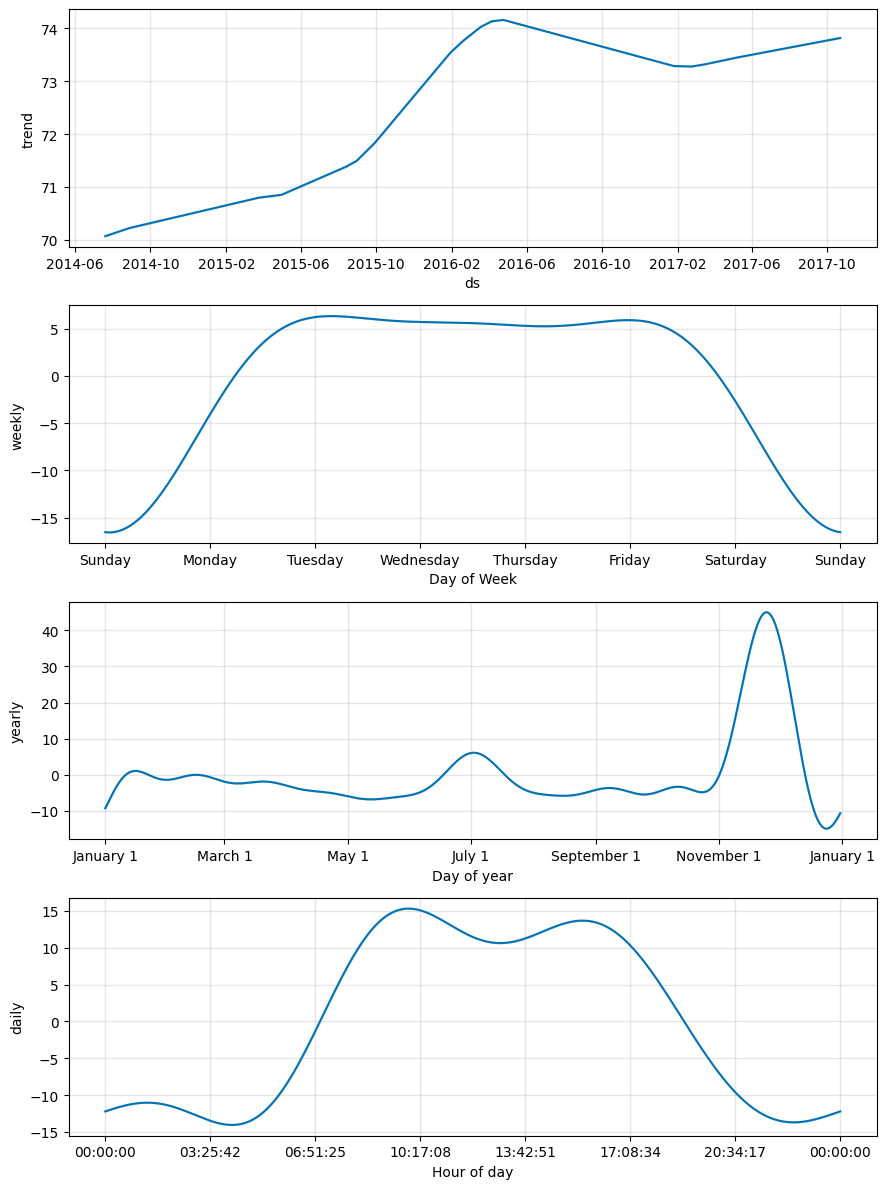

In [88]:
# Python
fig2 = model.plot_components(forecast)


In [98]:
# import plotly.graph_objects as go
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(model, forecast)


## save model

In [96]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)